In [1]:
%pylab inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
set_printoptions(linewidth=300, threshold=200000, suppress=True, precision = 8)


Populating the interactive namespace from numpy and matplotlib


In [2]:
figsize(16,9)
def rf1h(dx, N, p):
    e, No = p
    dN = e * No * (N > 0)
    return -dN * dx

def rf1r(dx, N, p):
    e = p[0]
    dN = - e * N
    return dN * dx


def rf2h(dx, N, p):
    a, Ht, No = p
    #print(a,Ht, No)
    dN = (a * No) / (1 + a * Ht * No) * (N > 0)
    return -dN * dx

def rf2r(dx, N, p):
    a, Ht, No = p
    dN = (a * N) / (1 + a * Ht * N)
    return -dN * dx


def rf3h(dx, N, p):
    a, Ht, No = p
    N2 = No ** 2
    dN = (a * N2) / (1 + a * Ht * N2) * (N > 0)
    return -dN * dx

def rf3r(dx, N, p):
    a, Ht, No = p
    N2 = N ** 2
    dN = (a * N2) / (1 + a * Ht * N2)
    return -dN * dx

def rfgh(dx, N, p):
    a, Ht, k, No = p
    N2 = No ** k
    dN = (a * N2) / (1 + a * Ht * N2) * (N > 0)
    return -dN * dx

def rfgr(dx, N, p):
    a, Ht, k, No = p
    N2 = N ** k
    dN = (a * N2) / (1 + a * Ht * N2)
    return -dN * dx


def rfl(dx, sv, p):
    """
    Functional response with learning
    la = learning in a
    lH = learning in handling time
    Mnt = minimum handling time
    ha = host depletion
    No = N initial
    sv = state variables
    """
    N, a, Ht = sv
    la, lH, Mnt, hd, No = p[:5]
    #print(la, lH, N, a, Ht)
    if hd: N2 = N
    else:  N2 = No
    
    dN = (a * N2) / (1 + a * Ht * N2) * (N > 0)
    da = la * (1 - a) * dN
    dH = lH * (Ht - Mnt) * dN
    return array([-dN, da, -dH]) * dx


def rk4(f, h, y, p):
    dx = h/2.
    k1 = f(dx, y, p)
    k2 = f(dx, y + k1 / 2, p)
    k3 = f(dx, y + k2 / 2, p)
    k4 = f(dx, y + k3, p)
    return y + (k1 + 2 * k2 + 2 * k3 + k4) / 6


def plot_funcion(f, p, nombre = '', grafica = "integral", sv = 1, tmax = 20, ax = False):
    import crf_dinamica as rf
    if len(p) == 7:
        fraccion = 1024
    else:
        fraccion = 128
    
    x = linspace(0, tmax, fraccion + 1)
    p[-1] = x
    
    y = -f(1, x, p)
    
    if grafica == "integral":
        ax.plot(x, y, label = nombre)
    elif grafica == "derivada":
        ax.plot(x[1:], (y[1:] - y[:-1]), label = nombre)
    return x, y


def plot_rfn(f, p, nombre = '', grafica = "integral", sv = 1, tmax = 5, Nmax = 200, ax = False, k = 0):
    y = zeros((Nmax))
    x = arange(1, Nmax + 1)
    if k > 0: x = x ** k
    #for i in range(Nmax):
    #p[-sv] = x[i]
    xx, y = plot_funcion(f, p, grafica = '', sv = sv, tmax = Nmax, ax = ax)
    if grafica == "integral":
        ax.plot(y, label = nombre)
    elif grafica == "derivada":
        ax.plot((y[1:] - y[:-1]), label = nombre)
    elif grafica == "derivada2":
        dy = y[1:] - y[:-1]
        ax.plot((dy[1:] - dy[:-1]), label = nombre)
    elif grafica == 'd20':
        dy =  y[1:] -  y[:-1]
        d2 = dy[1:] - dy[:-1]
        d2s = array(where(sign(d2[1:]) != sign(d2[:-1])))
        if d2s.size == 0:
            d2s = array([9e9])
        print("%3d %3d %8.4f %8.4f %8.4f"%(len(y), len(dy), len(d2), d2s.min(), d2.max(), d2.min()))
        return d2s.min(), d2.max(), d2.min()
    return x,y

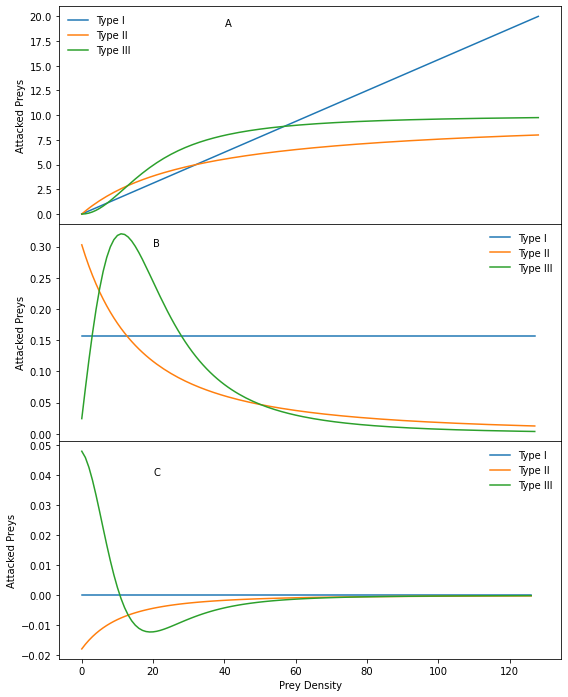

In [3]:
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'

figsize(9,12)

fig, (ax1,ax2,ax3) = plt.subplots(3, 1, sharex=True, gridspec_kw={'hspace': 0, 'wspace': 0})

ax1.text(40,19,     "A")
ax2.text(20, 0.3,   "B")
ax3.text(20, 0.04, "C")

p1 = [0.1,  200.0]
p2 = [0.2,  0.1,  200.0]
p3 = [0.01, 0.1,  200.0]

x,sdh = plot_rfn(rf1h, p1,   "Type I", sv = 1, ax = ax1)
x,sdh = plot_rfn(rf2h, p2, "Type II", sv = 3, ax = ax1)
x,sdh = plot_rfn(rf3h, p3, "Type III", sv = 1, ax = ax1)

ax1.legend(frameon = False)
#xlabel("Offered N")
ax1.set_ylabel("Attacked Preys")
#ax1.grid()
#show()

x,sdh = plot_rfn(rf1h, p1,   "Type I", sv = 1, ax = ax2, grafica = "derivada")
x,sdh = plot_rfn(rf2h, p2, "Type II", grafica = "derivada", sv = 3, ax = ax2)
x,sdh = plot_rfn(rf3h, p3, "Type III", grafica = "derivada", sv = 1, ax = ax2)
ax2.legend(frameon = False)
#ax2.set_xlabel("Offered N")
ax2.set_ylabel("Attacked Preys")
#ax2.grid()
#show()

x,sdh = plot_rfn(rf1h, p1,   "Type I", sv = 1, ax = ax3, grafica = "derivada2")
x,sdh = plot_rfn(rf2h, p2,  "Type II", grafica = "derivada2", sv = 3, ax = ax3)
x,sdh = plot_rfn(rf3h, p3, "Type III", grafica = "derivada2", sv = 1, ax = ax3)
ax3.legend(frameon = False)
ax3.set_xlabel("Prey Density")
ax3.set_ylabel("Attacked Preys")
#ax3.grid()
show()